In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('input/MoneyForGas.csv',sep='\t')
data.head(20)

Total Miles  Total Payed
0        390.00        36.66
1        403.00        37.05
2        396.50        34.71
3        383.50        32.50
4        321.10        32.63
5        391.30        34.45
6        386.10        36.79
7        371.80        37.44
8        404.30        38.09
9        392.60        38.09
10       386.49        38.74
11       395.20        39.00
12       385.50        40.00
13       372.00        36.21
14       397.00        34.05
15       407.00        41.79
16       372.33        30.25
17       375.60        38.83
18       399.00        39.66

In [3]:
# Give the dimensions of the dataset
data.shape

(19, 2)

In [4]:
import math

def roundup(x):
    return int(math.ceil(x / 10.0)) * 10

def rounddown(x):
    return int(math.floor(x / 10.0)) * 10

In [5]:
xmin = rounddown(data['Total Miles'].min()) - 10
print(xmin)

310


In [6]:
xmax = roundup(data['Total Miles'].max()) + 10
print(xmax)

420


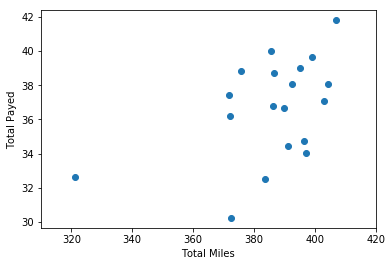

In [7]:
# Plot the dataset
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(data['Total Miles'], data['Total Payed'])
plt.xlim([xmin, xmax])
plt.xlabel('Total Miles')
plt.ylabel('Total Payed')

In [8]:
from sklearn.model_selection import train_test_split
X = data.drop('Total Payed',axis=1)
y = data['Total Payed']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [9]:
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [10]:
# First we are using LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

#To retrieve the intercept:
print("Intercept")
print(model.intercept_)
print()
#For retrieving the slope:
print("Slope")
print(model.coef_)
print()

Intercept
-2.0949162436277504

Slope
[0.10004607]



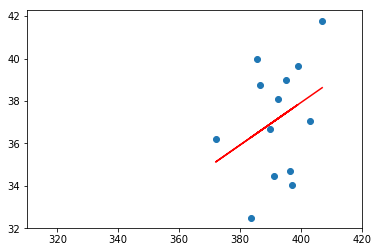

In [11]:
plt.scatter(X_train, y_train)
plt.xlim([xmin, xmax])
plt.plot(X_train, model.intercept_ + X_train * model.coef_, color='red')

plt.show()

In [12]:
totalPaid = model.intercept_ + 1200 * model.coef_
print(totalPaid)

[117.96036684]


In [13]:
y_predict = model.predict(X_test)

MAE = metrics.mean_absolute_error(y_test,y_predict)
print('Mean Absolute Error: '+ str(MAE))
print()

MSE = metrics.mean_squared_error(y_test,y_predict)
print('Mean Squared Error: '+ str(MSE))
print()

RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error: '+ str(RMSE))
print()

r2 = metrics.r2_score(y_test,y_predict)
print('R square: ' + str(r2))  
print()

Mean Absolute Error: 2.2852664881851346

Mean Squared Error: 7.938234785486025

Root Mean Squared Error: 2.817487317715206

R square: 0.19062689023170143



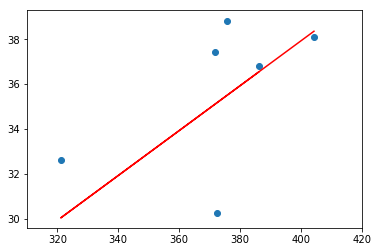

In [14]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_predict, color='red')
plt.xlim([xmin, xmax])
plt.show()